# Answering Business Questions
## Best data science content to write about

### What is Stack Exchange?
[Stack Exchange](https://stackexchange.com/about) is a network of communities created and run by enthusiasts who are passionate about those topics. Any one can ask questions and get answers. Each asnwer can be upvoted or downvoted so that all the best answers can rise to the top where they are easy to find. <br> For this project, we will be focusing on the Data Science Stack Exchange. DSSE is a question and answer site for professionals and anyone interested in learning more about the field of Data Science.<br> The site subdivides into the following - <br>
<list>
<ul>questions - a list of all questions</ul>
<ul>tags - labels used to categorize questions with other similar questions</ul>
<ul>users - a list of all the users active on the DSSE</ul> 
<ul>unanswered - unanswered questions on the website</ul> 
</list>

### Acessing data
The best way to access all the data in the Data Science Stack Exchange is using the Data Explorer, an open source database for all its websites. <br>The DSSE database contains close to 30 tables. Out of these, 'Tags' and 'Posts' look like a good place to start looking for popular content. <br> We can get a list of all the sub-fields (tags) that are asked about m
ost often. Running a simple query on 'Tags' will show the five most questioned tags -<br>
<code>
SELECT TOP 10 * FROM Tags
ORDER BY Count Desc
</code>
<table>,
      <tr>,
        <th>Id</th>,
        <th>TagName</th>,
        <th>Count</th>,
     </tr>,
      <tr>,
        <td>2</td>,
        <td>machine-learning</td>,
        <td>7592</td>,
      </tr>,
      <tr>,
        <td>46</td>,
        <td>python</td>,
        <td>4350</td>,
      </tr>,
      <tr>,
        <td>81</td>,
        <td>neural-network</td>,
        <td>3157</td>,
      </tr>,
      <tr>,
        <td>194</td>,
        <td>deep-learning</td>,
        <td>3049</td>,
      </tr>,
      <tr>,
       <td>77</td>,
        <td>classification</td>,
        <td>2058</td>,
      </tr>,
      <tr>,
</table>
However, it gives no information on whether the interest in these tags are recent or a thing of the past. <br>
To get a more up-to-date information on the interests, we run the following query on Posts - <br>
<code>
SELECT Id, CreationDate,
       Score, ViewCount, Tags,
       AnswerCount, FavoriteCount
  FROM posts
 WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019
 ORDER BY CreationDate
</code> 
<br> The result from the query is stored in <b>2019_questions.csv </b>

## Downloading the data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
questions = pd.read_csv('2019_questions.csv', parse_dates=['CreationDate'])
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [3]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  1407 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


## Exploratory data analysis

In [4]:
questions.isna().sum()

Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    7432
dtype: int64

The only column with null values is FavoriteCount. Over 84% of the values are null. The values in this column indicate the number of times the post is stored as a 'favorite' by users. A missing value probably indicates a 0 favorite count.

In [5]:
questions.fillna(0, inplace=True)
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  8839 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [6]:
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,0.0
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,0.0
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,0.0
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,0.0
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,0.0


Lets transform the tags column to make it more readable.

In [7]:
def change_tags(tags):
    tags = tags.replace('><', ',')
    tags = tags.strip('[<,>]')
    return tags

questions['Tags'] = questions['Tags'].apply(change_tags)
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"machine-learning,data-mining",0,0.0
1,44420,2019-01-23 09:34:01,0,25,"machine-learning,regression,linear-regression,...",0,0.0
2,44423,2019-01-23 09:58:41,2,1651,"python,time-series,forecast,forecasting",0,0.0
3,44427,2019-01-23 10:57:09,0,55,"machine-learning,scikit-learn,pca",1,0.0
4,44428,2019-01-23 11:02:15,0,19,"dataset,bigdata,data,speech-to-text",0,0.0


In the next steps we'll count how many times each tag was used as well as how many times each tag was viewed (via the ViewCount). We'll also create visualizations for the top tags

In [8]:
#Count how many times each tag appears in the column
tag_dict = {}
for tag in questions['Tags']:
    temp = tag.split(',')
    for key in temp:
        if key in tag_dict.keys():
            tag_dict[key] += 1
        else:
            tag_dict[key] = 1
            
tag_df = pd.DataFrame(list(tag_dict.items()), columns=['tags', 'count'])
tag_df.head()

,tags,count
0,machine-learning,2693
1,data-mining,217
2,regression,347
3,linear-regression,175
4,regularization,50


In [9]:
top_tags = tag_df.sort_values(by='count', ascending=False).iloc[:20]
top_tags

,tags,count
0,machine-learning,2693
5,python,1814
21,deep-learning,1220
39,neural-network,1055
22,keras,935
57,classification,685
45,tensorflow,584
9,scikit-learn,540
26,nlp,493
23,cnn,489


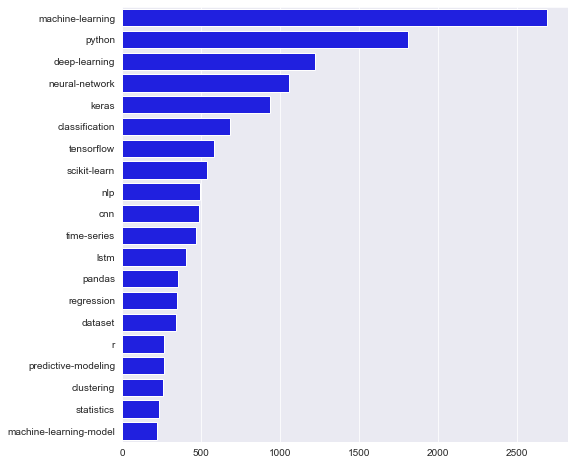

In [10]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
sns.barplot(x = top_tags['count'], y=top_tags['tags'], ax=ax, color='blue')
ax.set_xlabel('')
ax.set_ylabel('')
plt.savefig('Figures/Top-Tags.png', bbox_inches='tight')

In [11]:
#Calculate the Viewcount values for each tag
most_viewed_dict = {}
for i, tags in enumerate(questions['Tags']):
    tags = tags.split(',')
    for tag in tags:
        if tag in most_viewed_dict.keys():
            most_viewed_dict[tag] += questions['ViewCount'].iloc[i]
        else:
            most_viewed_dict[tag] = questions['ViewCount'].iloc[i]
            
most_viewed_df = pd.DataFrame(list(most_viewed_dict.items()), columns=['tags', 'Viewcount'])
most_viewed_df.sort_values(by='Viewcount', ascending=False).iloc[:20]

,tags,Viewcount
5,python,537585
0,machine-learning,388499
22,keras,268608
21,deep-learning,233628
31,pandas,201787
39,neural-network,185367
9,scikit-learn,128110
45,tensorflow,121369
57,classification,104457
86,dataframe,89352


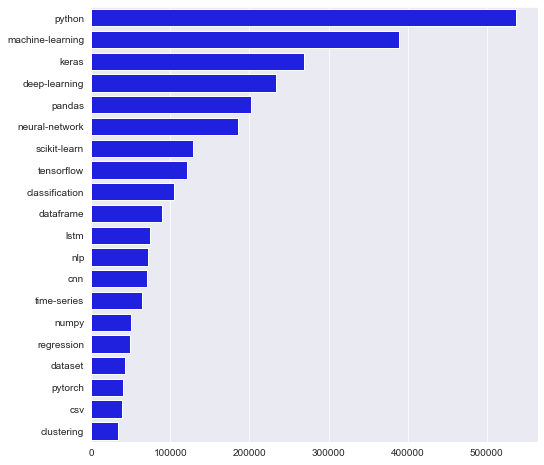

In [12]:
top_views = most_viewed_df.sort_values(by='Viewcount', ascending=False).iloc[:20]
fig, ax = plt.subplots(1,1,figsize=(8,8))
sns.barplot(x = top_views['Viewcount'], y=top_views['tags'], ax=ax, color='blue')
ax.set_xlabel('')
ax.set_ylabel('')
plt.savefig('Figures/Top-ViewCount.png', bbox_inches='tight')

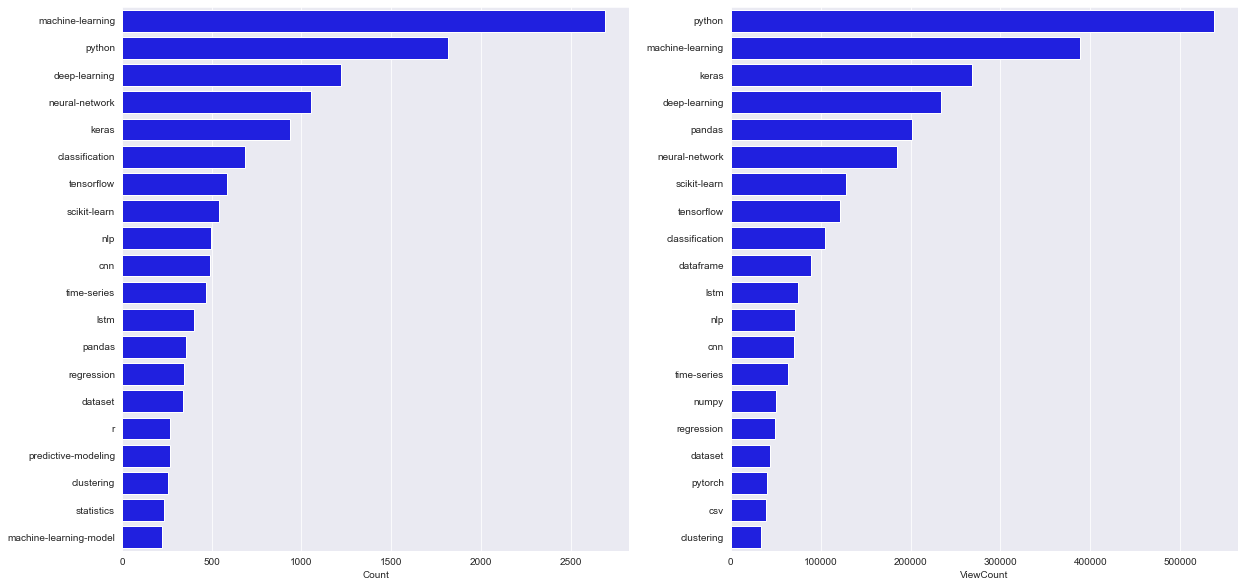

In [13]:
#lets plot the two plots side by side
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
sns.barplot(x = top_tags['count'], y=top_tags['tags'], ax=ax1, color='blue')
sns.barplot(x = top_views['Viewcount'], y=top_views['tags'], ax=ax2, color='blue')
ax1.set_xlabel('Count')
ax2.set_xlabel('ViewCount')
ax1.set_ylabel('')
ax2.set_ylabel('')
plt.savefig('Figures/Top-Tags&Views.png', bbox_inches='tight')

Most of the tags present in top_tags, e.g., python, machine-learning, pandas etc are also present in top_views.

In [14]:
top_tags.merge(top_views, how='left')

,tags,count,Viewcount
0,machine-learning,2693,388499.0
1,python,1814,537585.0
2,deep-learning,1220,233628.0
3,neural-network,1055,185367.0
4,keras,935,268608.0
5,classification,685,104457.0
6,tensorflow,584,121369.0
7,scikit-learn,540,128110.0
8,nlp,493,71382.0
9,cnn,489,70349.0


In [15]:
top_views.merge(top_tags, how='left')

,tags,Viewcount,count
0,python,537585,1814.0
1,machine-learning,388499,2693.0
2,keras,268608,935.0
3,deep-learning,233628,1220.0
4,pandas,201787,354.0
5,neural-network,185367,1055.0
6,scikit-learn,128110,540.0
7,tensorflow,121369,584.0
8,classification,104457,685.0
9,dataframe,89352,NaN


A quick look at both top_tags ans top_views suggest plenty of overlap between the two dataframe. The majority of tags fall under the broader umbrella of deep learning/machine learning. A good place to start producing content might be in deep learning using python and keras.

### Deep-learning: popular or passing fad
Finally, lets do analysis to make sure that 'deep-learning' is really popular and not just a passing fad.

In [16]:
all_questions = pd.read_csv('all_questions.csv', parse_dates=['CreationDate'])
all_questions.head()
all_questions.shape

(21576, 3)

In [17]:
all_questions['Tags'] = all_questions['Tags'].apply(change_tags)
all_questions.sample(10)

,Id,CreationDate,Tags
6953,17911,2017-03-27 19:53:17,"python,neural-network,audio-recognition"
11951,9484,2015-12-22 12:56:20,"neural-network,unsupervised-learning,c"
18784,64637,2019-12-11 11:00:52,"classification,keras"
13408,10085,2016-02-04 08:43:12,"machine-learning,predictive-modeling"
18830,12780,2016-07-14 18:52:58,"machine-learning,regression,linear-regression,..."
19394,55089,2019-07-04 18:59:56,"deep-learning,tensorflow,java,opencv"
6308,58097,2019-08-23 18:05:13,"data-cleaning,preprocessing,categorical-data"
907,37393,2018-08-24 11:51:31,"python,scikit-learn,random-forest,metric,grid-..."
14717,44389,2019-01-22 18:09:20,"machine-learning,data-mining"
9447,49589,2019-04-19 13:24:58,"python,pandas,dataframe"


In [18]:
#deep_learning_tags as a 'set' of tags that can be classified as deep learning. These values were selected from the top_tags & top_views df
#set module was used as it makes it easier to do an intersection operation
deep_learning_tags = {'deep-learning', 'nlp', 'cnn', 
                      'tensorflow', 'classification', 
                      'keras', 'lstm', 'neural-network'}
def is_deep_learning(tags):
    tags = tags.split(',')
    if len(set(tags) & deep_learning_tags) == 0: #empty set will return length of zero
        return 0
    else:
        return 1
        
all_questions['DeepLearning'] = all_questions['Tags'].apply(is_deep_learning)
all_questions.head(10)

,Id,CreationDate,Tags,DeepLearning
0,45416,2019-02-12 00:36:29,"python,keras,tensorflow,cnn,probability",1
1,45418,2019-02-12 00:50:39,neural-network,1
2,45422,2019-02-12 04:40:51,"python,ibm-watson,chatbot",0
3,45426,2019-02-12 04:51:49,keras,1
4,45427,2019-02-12 05:08:24,"r,predictive-modeling,machine-learning-model,s...",0
5,45428,2019-02-12 05:43:18,cnn,1
6,45430,2019-02-12 06:20:30,"machine-learning,learning",0
7,45431,2019-02-12 07:26:56,machine-learning,0
8,45433,2019-02-12 08:56:23,"python,keras,tensorflow,lstm",1
9,45434,2019-02-12 09:09:01,"neural-network,feature-selection,mlp",1


In [19]:
print(all_questions['CreationDate'].max())
all_questions['CreationDate'].min()

2020-01-19 03:01:03


Timestamp('2014-05-13 23:58:30')

The data is from May 2014 to January 2020. I will remove the two months from the analysis and calculate how many deep-learning questions were asked every half year.

In [20]:
from datetime import datetime, date
all_questions['year_month'] = all_questions['CreationDate'].apply(lambda x: datetime.strftime(x, "%Y-%m"))
all_questions.head()

,Id,CreationDate,Tags,DeepLearning,year_month
0,45416,2019-02-12 00:36:29,"python,keras,tensorflow,cnn,probability",1,2019-02
1,45418,2019-02-12 00:50:39,neural-network,1,2019-02
2,45422,2019-02-12 04:40:51,"python,ibm-watson,chatbot",0,2019-02
3,45426,2019-02-12 04:51:49,keras,1,2019-02
4,45427,2019-02-12 05:08:24,"r,predictive-modeling,machine-learning-model,s...",0,2019-02


In [21]:
clean_df = all_questions[(all_questions['year_month']!='2014-05') & 
                         (all_questions['year_month']!='2020-01')].copy()


In [22]:
def convert_halfyear(date_val):
    if date_val >= date(2015,6,1) and date_val <= date(2015,12,31):
        return '15H2'
    elif date_val >= date(2016,1,1) and date_val <= date(2016,5,31):
        return '16H1'
    elif date(2016,6,1) <= date_val <= date(2016,12,31):
        return '16H2'
    elif date(2017,1,1) <= date_val <= date(2017,5,31):
        return '17H1'
    elif date(2017,6,1) <= date_val <= date(2017,12,31):
        return '17H2'
    elif date(2018,1,1) <= date_val <= date(2018,5,31):
        return '18H1'
    elif date(2018,6,1) <= date_val <= date(2018,12,31):
        return '18H2'
    elif date(2019,1,1) <= date_val <= date(2019,5,31):
        return '19H1'
    elif date(2019,6,1) <= date_val <= date(2019,12,31):
        return '19H2'
    
clean_df['Timeperiod'] = clean_df['CreationDate'].dt.date.apply(convert_halfyear)
clean_df.head()

,Id,CreationDate,Tags,DeepLearning,year_month,Timeperiod
0,45416,2019-02-12 00:36:29,"python,keras,tensorflow,cnn,probability",1,2019-02,19H1
1,45418,2019-02-12 00:50:39,neural-network,1,2019-02,19H1
2,45422,2019-02-12 04:40:51,"python,ibm-watson,chatbot",0,2019-02,19H1
3,45426,2019-02-12 04:51:49,keras,1,2019-02,19H1
4,45427,2019-02-12 05:08:24,"r,predictive-modeling,machine-learning-model,s...",0,2019-02,19H1


After cleaning and assigning the right time periods, we will calculate the total as well as the relative number deep learning questions asked in each time period. To do that we will group the data by 'Timeperiod'

In [23]:
grouped = clean_df.groupby('Timeperiod')
rel_ques = grouped['DeepLearning'].sum() / grouped['Id'].size()
tot_ques = grouped['DeepLearning'].sum()

In [25]:
#Create a dataframe that stores the relative and total questions about deep-learning in different time periods
half_yearly = rel_ques.reset_index()
half_yearly.rename(columns={0:'Relative'},inplace=True)
half_yearly['Total'] = tot_ques.values
half_yearly

,Timeperiod,Relative,Total
0,15H2,0.259214,211
1,16H1,0.301974,260
2,16H2,0.329961,424
3,17H1,0.409716,447
4,17H2,0.424437,792
5,18H1,0.458740,1034
6,18H2,0.473455,1525
7,19H1,0.443852,1581
8,19H2,0.436928,2293


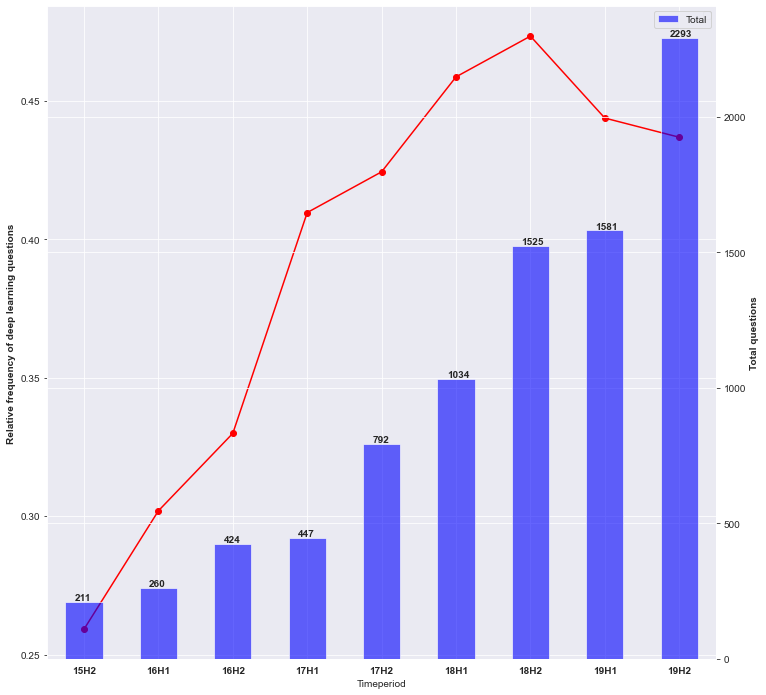

In [27]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
half_yearly.plot(x='Timeperiod', y='Relative', marker = 'o', color='red', ax=ax)
ax.set_ylabel('Relative frequency of deep learning questions', fontweight='bold')
ax.legend('')
ax2 = ax.twinx()
half_yearly.plot.bar(x='Timeperiod', y='Total', alpha=0.6, color='blue', ax=ax2)
ax2.set_ylabel('Total questions', fontweight='bold')
ax.set_xticklabels(half_yearly['Timeperiod'], fontweight='bold')

for i, val in enumerate(half_yearly['Total']):
    ax2.text(i-0.125, val+6, str(val), fontweight='bold')
    
plt.savefig('Figures/Time-vs-frequency-Deep-learning.png', bbox_inches='tight')

Ignoring the slight downtrend in the latter half of 2019, there has been a linear increase in the number of deep-learning questions asked every year since 2015. Therefore, we maintain our previous recommendation of creating content in field of deep-learning.